# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

from tqdm import tqdm_notebook

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 데이터 이해하기

### 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

## 칼럼 설명

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : Period of relationship with bank
 - Total_Relationship_Count : Total no. of products held by the customer
 - Months_Inactive_12_mon : No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : No. of Contacts in the last 12 months
 - Credit_Limit : Credit Limit on the Credit Card
 - Total_Revolving_Bal : Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 평가방식

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

## 대회 주소
https://www.kaggle.com/t/cd058141be084c4f81c9df010c587ae4

In [2]:
# 데이터의 경로 각자에 맞추어서 변경해주세요
data_dir = 'C:/Users/user/Tobigs/Assignment/5주차/Ensemble/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
submission = pd.read_csv(data_dir + 'sample_submission.csv')

In [3]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [4]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [5]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


# 데이터 전처리


In [6]:
train.shape

(8101, 20)

In [7]:
test.shape

(2026, 19)

In [8]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [9]:
test.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

데이터에 결측치는 존재하지 않는 것으로 보입니다.

하지만 진짜 결측치가 존재하지 않을까요?

결측치가 다른 이름으로 기록되어 있을 수도 있고 0으로 기록되어 있을 수도 있습니다.

이 부분은 한번 EDA를 통해서 확인해보세요!

# EDA

정형데이터의 경우 feature engineering 이 모델의 성능에 정말 큰 영향을 주기 때문에 EDA를 통해서 얻은 인사이트를 바탕으로 최고의 feature를 만들어보세요! 

In [10]:
train.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.291199,2.339958,35.905938,3.808172,2.347241,2.460931,8667.346587,1157.653746,7509.692840,0.760068,4444.729663,64.984199,0.711699,0.274665,0.160721
std,8.040300,1.300795,8.011260,1.553566,1.013624,1.098309,9127.897938,815.062550,9129.855775,0.218224,3448.702344,23.608677,0.235800,0.277166,0.367296
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,563.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2557.000000,289.000000,1316.000000,0.631000,2169.000000,45.000000,0.583000,0.020000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1273.000000,3508.000000,0.737000,3904.000000,67.000000,0.700000,0.173000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11135.000000,1781.000000,9930.000000,0.859000,4754.000000,81.000000,0.818000,0.504000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,138.000000,3.714000,0.999000,1.000000


In [11]:
train.describe(include='object')

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,8101,8101,8101,8101,8101
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,4286,2535,3749,2848,7546


In [12]:
# numerical 변수와 categorical 변수 나눠주기
numerical = train[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
categorical = train[['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

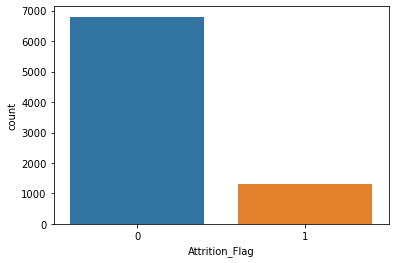

In [13]:
# target
sns.countplot(train['Attrition_Flag'])

시각화 결과 target 값은 불균형한 상태이기에 모델이 다수의 클래스로 편향될 수도 있음. SMOTE 방법론을 이용해 두 클래스 간의 차이를 줄일 예정임.

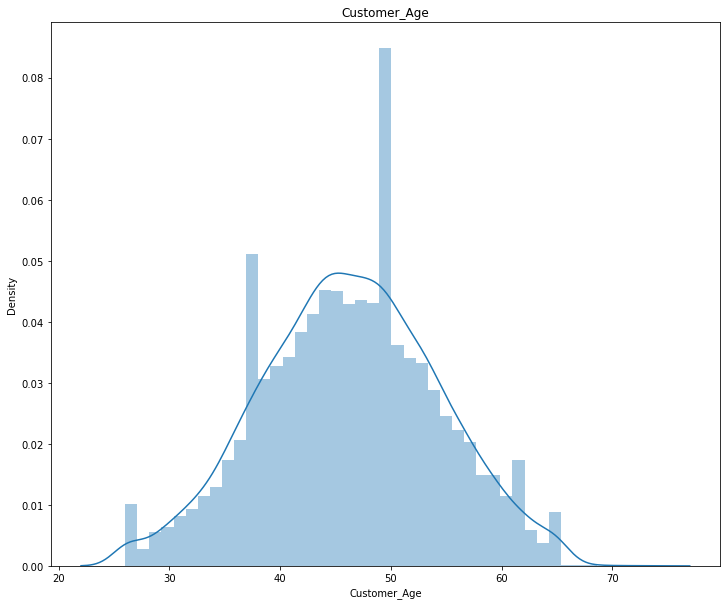

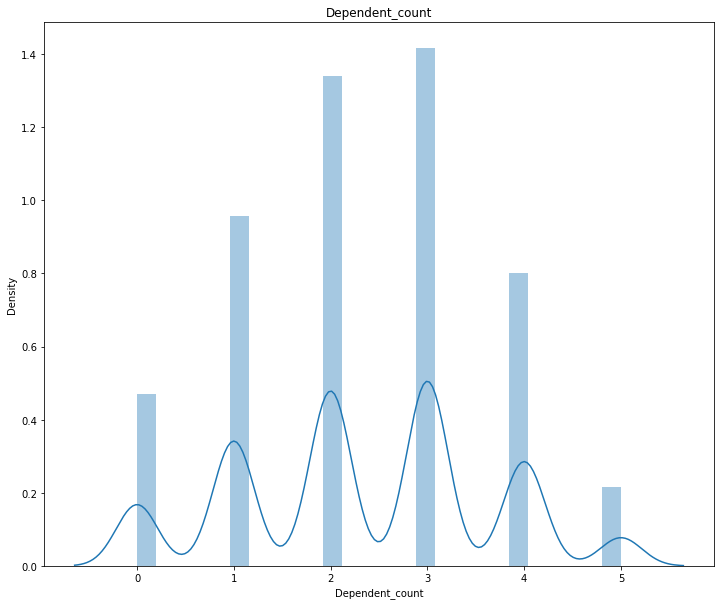

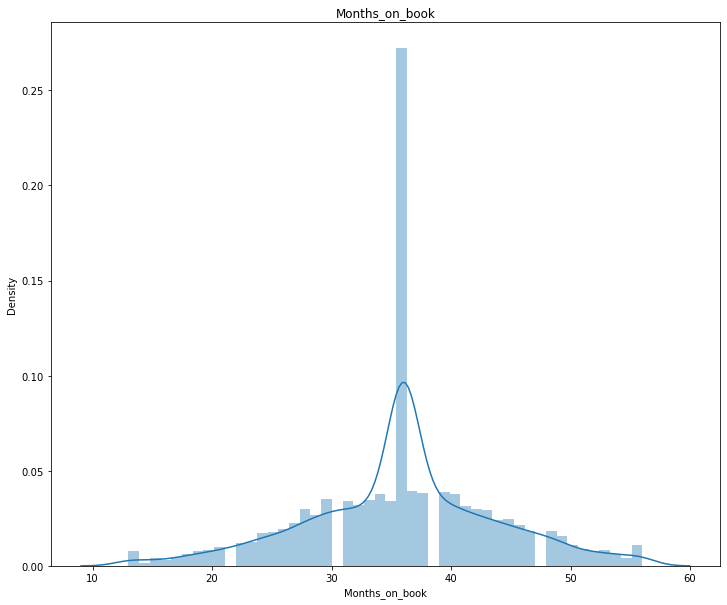

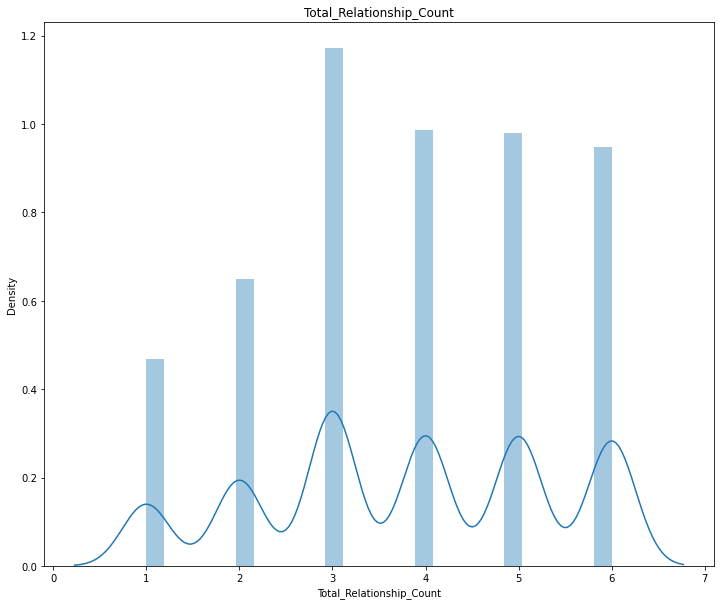

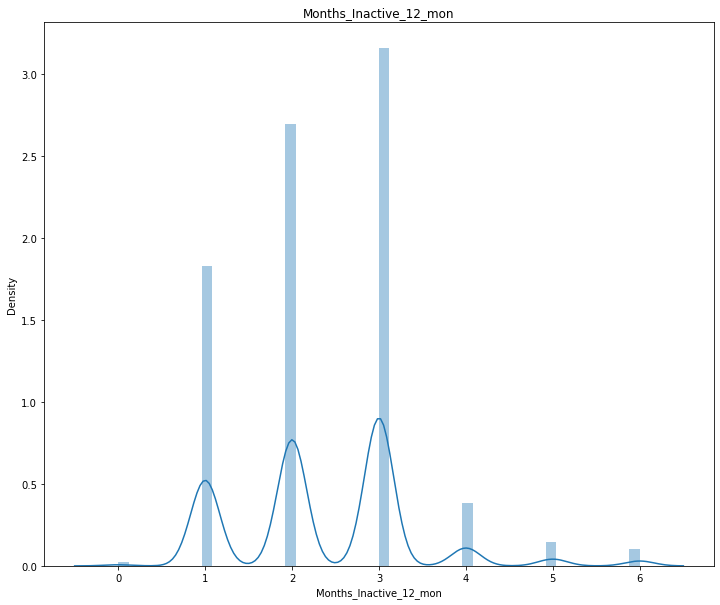

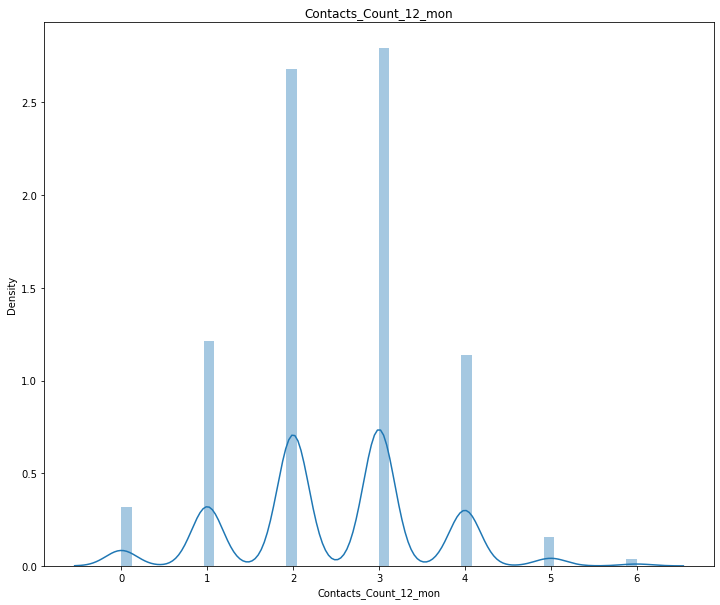

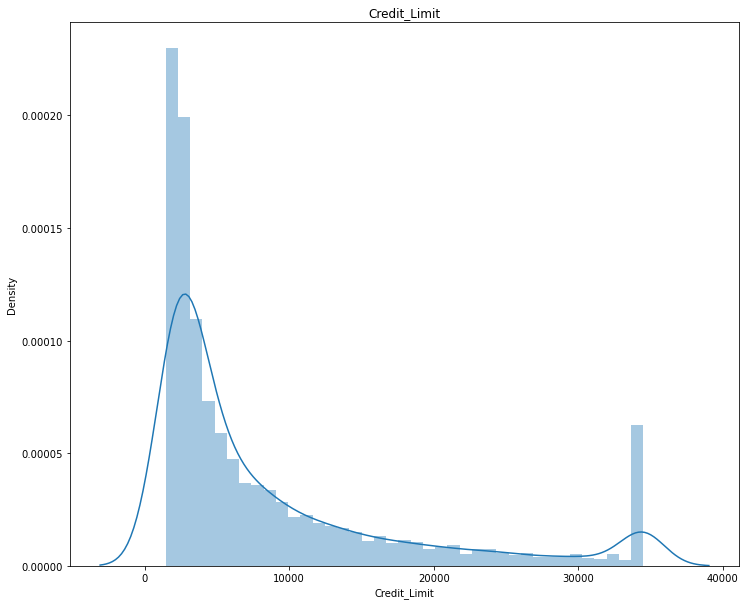

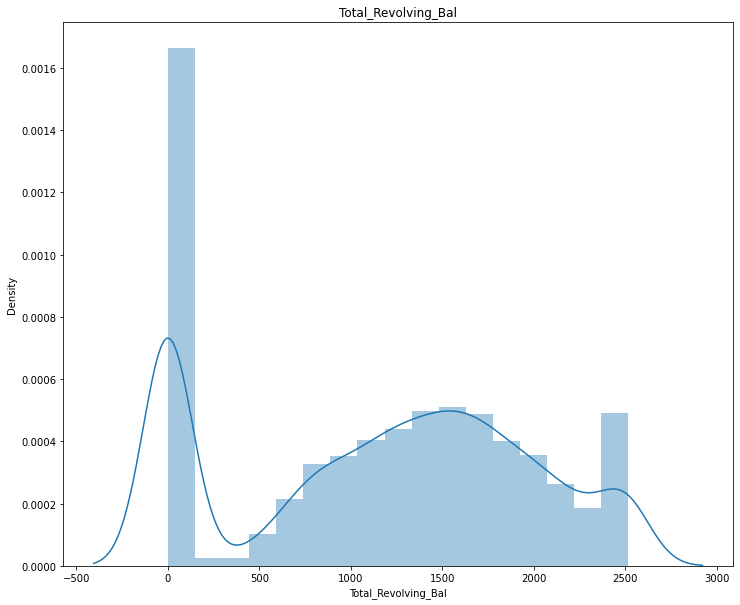

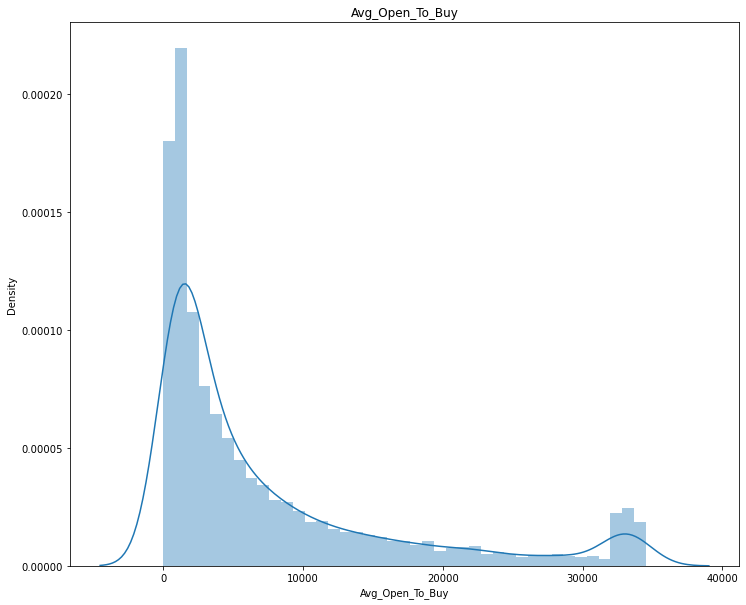

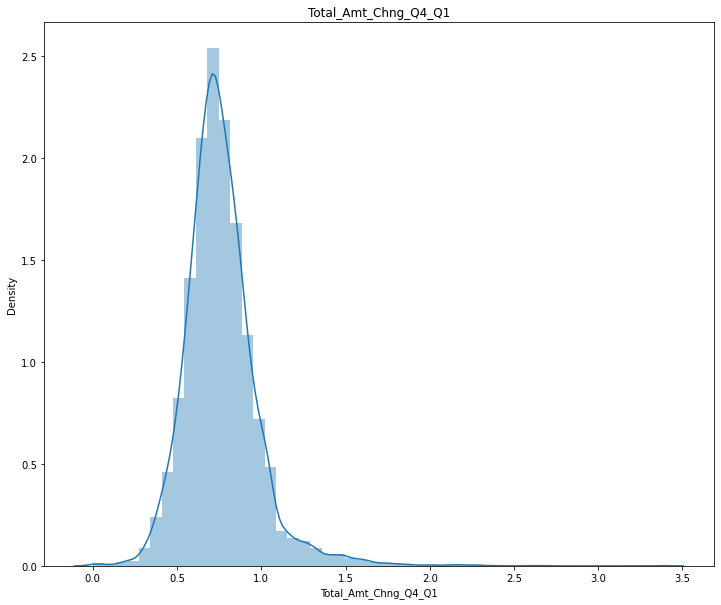

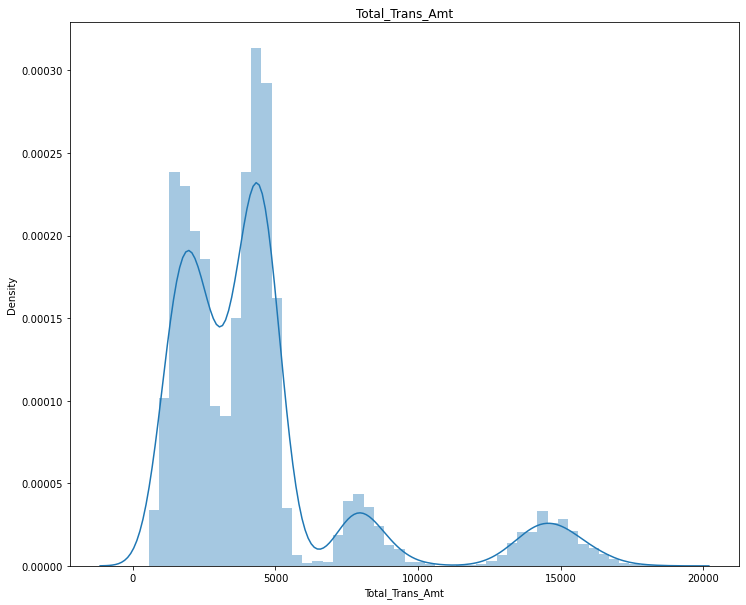

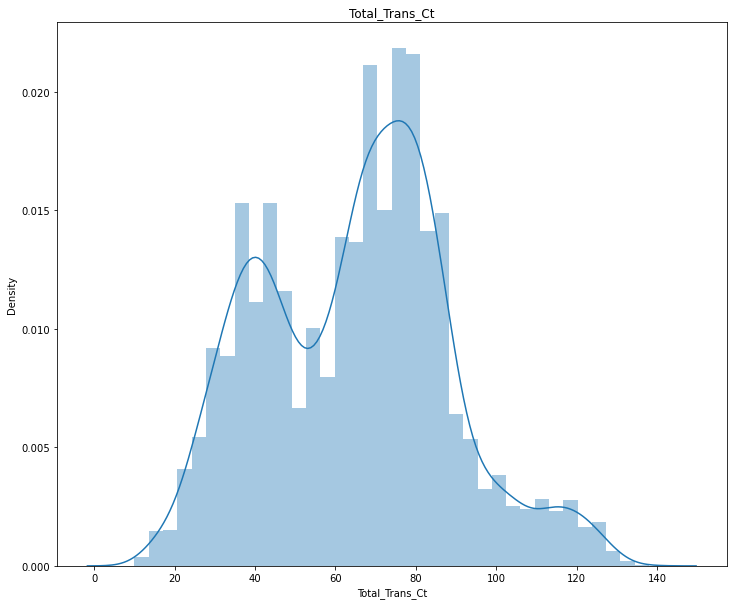

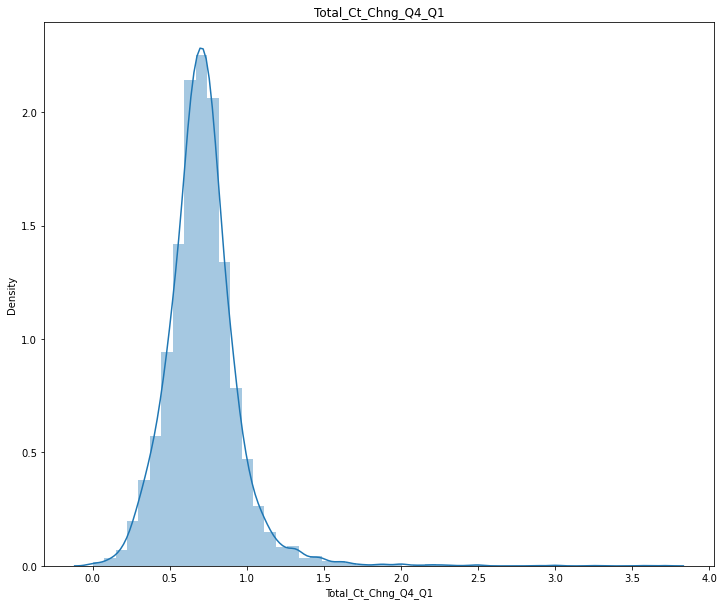

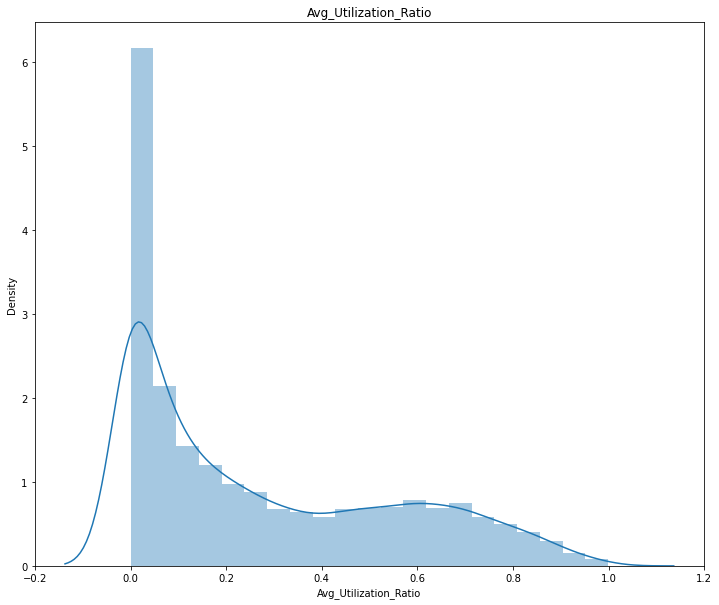

In [14]:
# numerical
for col in numerical:
    fig, ax = plt.subplots(figsize=(12,10))
    plt.title(col)
    sns.distplot(train[col], ax=ax)

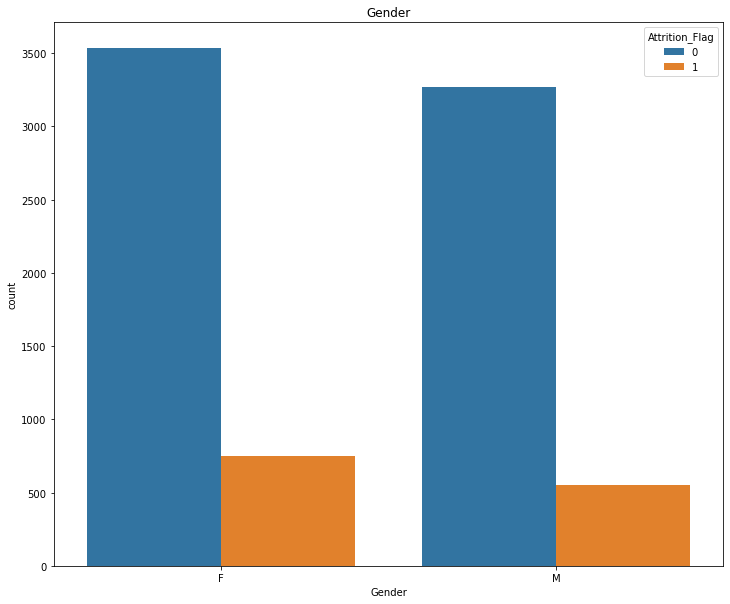

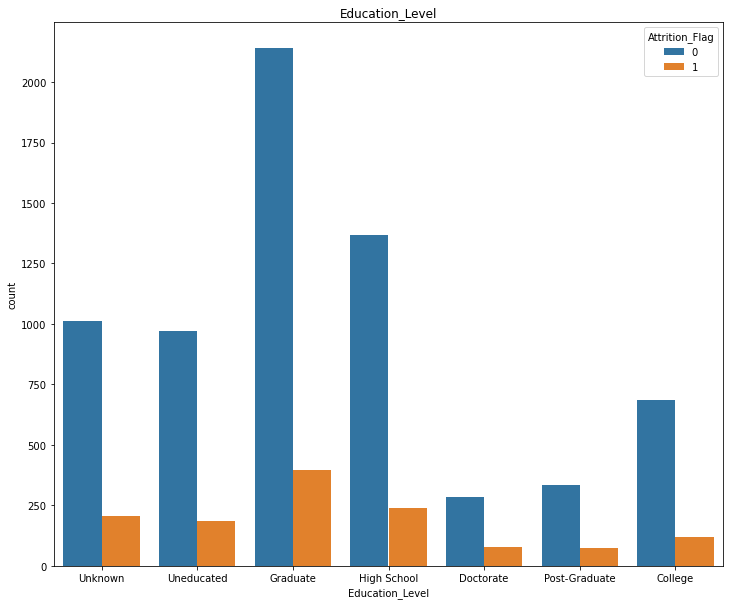

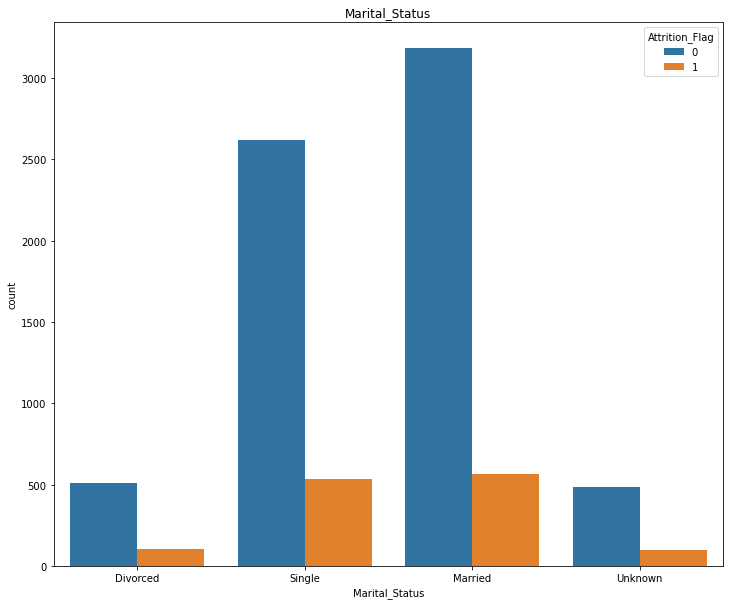

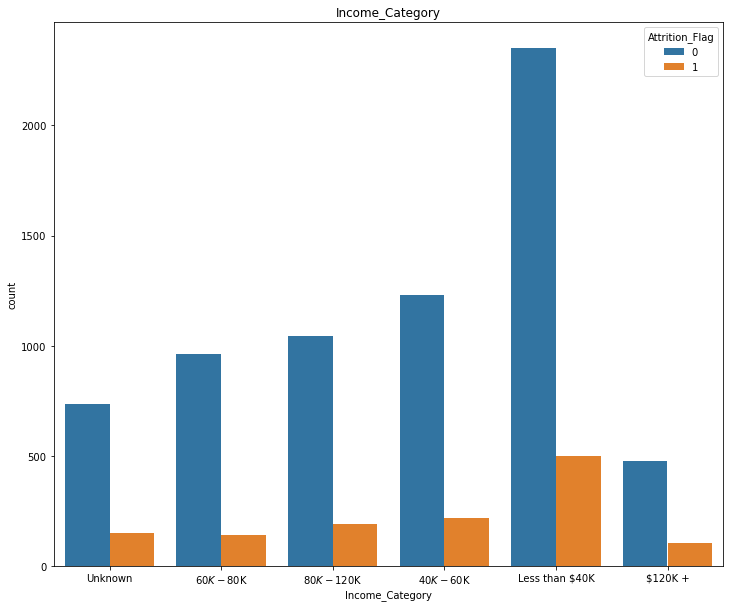

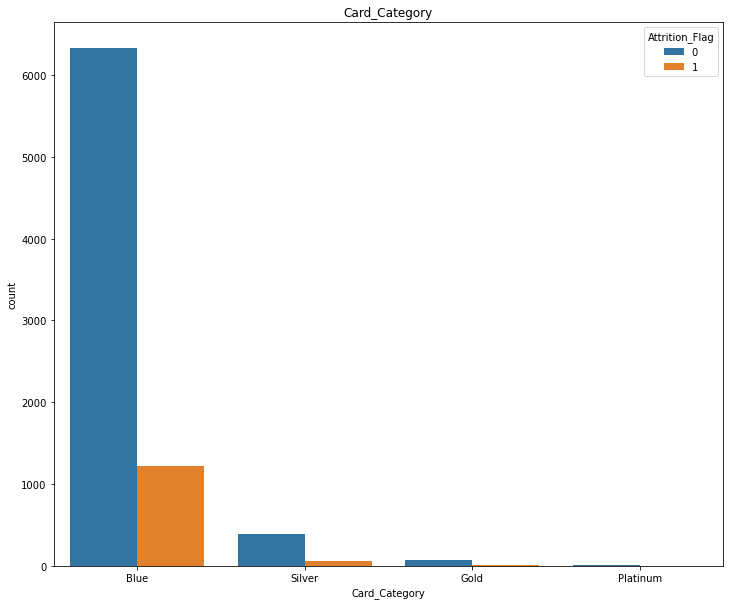

In [15]:
# categorical
for col in categorical:
    fig, ax = plt.subplots(figsize=(12,10))
    plt.title(col)
    sns.countplot(train[col], ax=ax, hue=train['Attrition_Flag'])

결측치는 없지만 `Unkown` 값이 있기에 제거해줌.

In [16]:
train.shape[0]

8101

In [17]:
# 결측치 처리
train_drop_na = train.mask(train.eq('Unknown')).dropna()
train_drop_na.shape[0]

5673

In [18]:
test.shape[0]

2026

In [19]:
test_drop_na = test.mask(test.eq('Unknown')).dropna()
test_drop_na.shape[0]

1408

In [20]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train['Attrition_Flag'] = encoder.fit_transform(train['Attrition_Flag'])
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [21]:
categorical_cols = categorical.columns.tolist()

le = LabelEncoder()

train[categorical_cols] = train[categorical_cols].apply(lambda col:le.fit_transform(col))

train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,0,1,6,0,5,0,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,1,3,5,2,2,0,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,1,0,5,0,3,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,0,1,2,2,1,0,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,0,0,5,1,4,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [22]:
test[categorical_cols] = test[categorical_cols].apply(lambda col:le.fit_transform(col))
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,0,2,0,2,4,0,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,1,1,0,1,3,0,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,1,0,6,1,1,0,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,1,3,6,2,2,0,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,0,2,3,1,1,0,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [23]:
features = test.columns.tolist()
target = 'Attrition_Flag'

X_train = train[features]
y_train = train[target]

X_test = test[features]

In [24]:
# SMOTE
print('existing customers : {}\n'.format(len(train[train['Attrition_Flag'] == 0])))
print('attrited customers : {}\n'.format(len(train[train['Attrition_Flag'] == 1])))

existing customers : 6799

attrited customers : 1302



In [26]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(train_X, train_y)

In [28]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', train_X.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (6480, 19) (6480,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (10878, 19) (10878,)
SMOTE 적용 후 레이블 값 분포: 
 0    5439
1    5439
Name: Attrition_Flag, dtype: int64


# Model

저는 라벨인코딩만을 이용한 간단한 베이스 라인 모델을 만들었습니다.

16기 분들은 feature engineering, 하이퍼 파라미터 튜닝, 앙상블 등 다양한 방법으로 성능이 우수한 모델을 만들어보세요!

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [30]:
log_clf = LogisticRegression(random_state=0)
log_clf.fit(train_X, train_y)
y_pred = log_clf.predict_proba(val_X)
print('LogisticRegression Logloss Score : ', log_loss(val_y, y_pred))
print('LogisticRegression Accuracy Score : ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))

LogisticRegression Logloss Score :  0.2760802938368316
LogisticRegression Accuracy Score :  0.8864898210980876


### SVC

In [31]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=0)
svm_clf.fit(train_X, train_y)
y_pred = svm_clf.predict_proba(val_X)
print('SVC Logloss Score : ', log_loss(val_y, y_pred))
print('SVC Accuracy Score : ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))

SVC Logloss Score :  0.33335035252342626
SVC Accuracy Score :  0.8710672424429364


### DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=None)
dt_clf.fit(train_X, train_y)
y_pred = dt_clf.predict_proba(val_X)
print('DecisionTreeClassifier Logloss Score : ', log_loss(val_y, y_pred))
print('DecisionTreeClassifier Accuracy Score: ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))

DecisionTreeClassifier Logloss Score :  2.2159363017092613
DecisionTreeClassifier Accuracy Score:  0.9358420727945712


### Bagging

In [33]:
from sklearn.ensemble import BaggingClassifier

dt_clf2 = DecisionTreeClassifier(random_state=0, max_depth=None)
bag_clf = BaggingClassifier(dt_clf2, n_estimators=500, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X, train_y)
y_pred = bag_clf.predict_proba(val_X)
print('BaggingClassifier Logloss Score : ', log_loss(val_y, y_pred))
print('BaggingClassifier Accuracy Score: ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))

BaggingClassifier Logloss Score :  0.1070783526229743
BaggingClassifier Accuracy Score:  0.958667489204195


### RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, n_estimators = 500, n_jobs=-1)
rf_clf.fit(train_X, train_y)
y_pred = rf_clf.predict_proba(val_X)
print('RandomForest Logloss Score : ', log_loss(val_y, y_pred))
print('RandomForest Accuracy Score: ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))      

RandomForest Logloss Score :  0.12459294901146314
RandomForest Accuracy Score:  0.9561998766193708


### Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(base_estimator = dt_clf2, n_estimators=500, learning_rate=0.1, random_state=0)
ada_clf.fit(train_X, train_y)
y_pred = ada_clf.predict_proba(val_X)
print('AdaBoost Logloss Score : ', log_loss(val_y, y_pred))
print('AdaBoost Accuracy Score: ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))  

AdaBoost Logloss Score :  2.1520150622368788
AdaBoost Accuracy Score:  0.9376927822331894


### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
gb_clf.fit(train_X, train_y)
y_pred = gb_clf.predict_proba(val_X)
print('GradientBoosting Logloss Score : ', log_loss(val_y, y_pred))
print('GradientBoosting Accuracy Score: ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))      

GradientBoosting Logloss Score :  0.07297967170448191
GradientBoosting Accuracy Score:  0.972239358420728


### XGB

In [37]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=0, n_estimators=500)
xgb_clf.fit(train_X, train_y)
y_pred = xgb_clf.predict_proba(val_X)
print('XGB Logloss Score : ', log_loss(val_y, y_pred))
print('XGB Accuracy Score: ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))

[13:47:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Logloss Score :  0.09394024879316255
XGB Accuracy Score:  0.9697717458359038


### LGBM

In [38]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(random_state=16, n_estimators=500)
lgbm_clf.fit(train_X, train_y)
y_pred = lgbm_clf.predict_proba(val_X)
print('LGBM Logloss Score : ', log_loss(val_y, y_pred))
print('LGBM Accuracy Score: ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))

LGBM Logloss Score :  0.12179198130469687
LGBM Accuracy Score:  0.9753238741517581


### Stacking

In [39]:
train_pred_li = []
val_pred_li = []
test_pred_li = []

for clf in [bag_clf, rf_clf, gb_clf, lgbm_clf]:
    clf.fit(train_X, train_y)
    
    y_train_pred = clf.predict_proba(train_X)
    train_pred_li.append(y_train_pred)
    
    y_val_pred = clf.predict_proba(val_X)
    val_pred_li.append(y_val_pred)
    
    y_test_pred = clf.predict_proba(X_test)
    test_pred_li.append(y_test_pred)

In [40]:
stacking_train = np.concatenate(train_pred_li, axis=1)
stacking_val = np.concatenate(val_pred_li, axis=1)
stacking_test = np.concatenate(test_pred_li, axis=1)

In [41]:
meta_model = LogisticRegression(random_state=0)

meta_model.fit(stacking_train, train_y)
y_pred = meta_model.predict_proba(stacking_val)
print('LogisticRegression Logloss Score : ', log_loss(val_y, y_pred))
print('LogisticRegression Accuracy Score : ', accuracy_score(val_y, np.argmax(y_pred, axis=1)))

LogisticRegression Logloss Score :  0.10385031693064607
LogisticRegression Accuracy Score :  0.9728562615669339


**후보 model**

* BaggingClassifier
* Gradient Boosting
* XGB
* LGBM

### Tunning

In [51]:
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import GridSearchCV

In [54]:
# Logloss를 줄이는 것이 목적이기 때문에 scoring을 logloss로 정의해줌
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

**BaggingClassifier**

In [64]:
params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}

grid_search = GridSearchCV(estimator=bag_clf, param_grid=params, cv=5,
                          scoring=LogLoss,
                          verbose=3,
                          return_train_score=True,
                          refit=True,
                          n_jobs=-1)

grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                                         n_estimators=500, n_jobs=-1),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [3, 5, 10, 20],
                         'base_estimator__max_features': [None, 'auto'],
                         'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10],
                         'base_estimator__min_samples_split': [2, 5, 7],
                         'bootstrap_features': [False, True],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             return_train_score=True,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=3)

In [65]:
tunned_bag = grid_search.best_estimator_
tunned_bag_pred = tunned_bag.predict_proba(val_X)

print('BaggingClassifier Logloss Score : ', log_loss(val_y, tunned_bag_pred))
print('BaggingClassifier Accuracy Score : ', accuracy_score(val_y, np.argmax(tunned_bag_pred, axis=1)))

GradientBoosting Logloss Score :  0.11569522336372991
GradientBoosting Accuracy Score :  0.9561998766193708


before tunning
* **BaggingClassifier Logloss Score :  0.1070783526229743**
* BaggingClassifier Accuracy Score:  0.958667489204195

after tunning
* BaggingClassifier Logloss Score :  0.11569522336372991
* BaggingClassifier Accuracy Score :  0.9561998766193708

튜닝 결과 성능이 더 안좋아짐.

**Gradient Boosting**

In [66]:
params = {
    'max_depth':[4,6,8],
    'n_estimators' : [100,500],
    'learning_rate' : [0.05,0.1]
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=params, cv=5, 
                           scoring=LogLoss, 
                           verbose = 3, 
                           return_train_score=True, 
                           refit = True, 
                           n_jobs=-1)

grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=500,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500]},
             return_train_score=True,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=3)

In [67]:
tunned_gb = grid_search.best_estimator_
tunned_gb_pred = tunned_gb.predict_proba(val_X)

print('GradientBoosting Logloss Score : ', log_loss(val_y, tunned_gb_pred))
print('GradientBoosting Accuracy Score : ', accuracy_score(val_y, np.argmax(tunned_gb_pred, axis=1)))

GradientBoosting Logloss Score :  0.07429146838977384
GradientBoosting Accuracy Score :  0.9716224552745218


before tunning
* **GradientBoosting Logloss Score :  0.07297967170448191**
* GradientBoosting Accuracy Score:  0.972239358420728

after tunning
* GradientBoosting Logloss Score :  0.07429146838977384
* GradientBoosting Accuracy Score :  0.9716224552745218

튜닝 결과 성능이 더 안좋아짐.

**XGB**

In [42]:
param = {
    'max_depth':[4,6,8],
    'n_estimators':range(500,901,200),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param, cv=5, 
                           scoring=LogLoss,
                           verbose = 3,
                           return_train_score = True,
                           refit = True,
                           n_jobs=-1)

grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[13:56:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=500, n_jobs=8,
                                     num_parallel...
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                              

In [48]:
tunned_xgb = grid_search.best_estimator_
tunned_xgb_pred = tunned_xgb.predict_proba(val_X)

print('XGB Logloss Score : ', log_loss(val_y, tunned_xgb_pred))
print('XGB Accuracy Score : ', accuracy_score(val_y, np.argmax(tunned_xgb_pred, axis=1)))

XGB Logloss Score :  0.09099749927791217
XGB Accuracy Score :  0.9710055521283159


before tunning
* XGB Logloss Score :  0.09394024879316255
* XGB Accuracy Score:  0.9697717458359038

after tunning
* **XGB Logloss Score :  0.09099749927791217**
* XGB Accuracy Score :  0.9710055521283159

성능이 향상됨.

**LGBM**

In [49]:
param = {
    'application': ['regression','binary'],
    'max_depth':[4,6,8],
    'n_estimators':range(100,701,300),
    'boosting' : ['gbdt','dart']
}

lgbm_grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param, cv=5, 
                           scoring=LogLoss,
                           verbose = 3,
                           return_train_score = True,
                           refit = True,
                           n_jobs=-1)

lgbm_grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


GridSearchCV(cv=5, estimator=LGBMClassifier(n_estimators=500, random_state=16),
             n_jobs=-1,
             param_grid={'application': ['regression', 'binary'],
                         'boosting': ['gbdt', 'dart'], 'max_depth': [4, 6, 8],
                         'n_estimators': range(100, 701, 300)},
             return_train_score=True,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=3)

In [50]:
tunned_lgbm = lgbm_grid_search.best_estimator_
tunned_lgbm_pred = tunned_lgbm.predict_proba(val_X)

print('LGBM Logloss Score : ', log_loss(val_y, tunned_lgbm_pred))
print('LGBM Accuracy Score : ', accuracy_score(val_y, np.argmax(tunned_lgbm_pred, axis=1)))

LGBM Logloss Score :  0.06845631803975931
LGBM Accuracy Score :  0.9747069710055521


before tunning
* LGBM Logloss Score :  0.12179198130469687
* LGBM Accuracy Score:  0.9753238741517581

after tunning
* **LGBM Logloss Score :  0.06845631803975931**
* LGBM Accuracy Score :  0.9747069710055521

성능이 많이 향상됨.

logloss값이 가장 낮은 tunned_LGBM을 최종 모델로 선정함.

# 예측

저는 Stacking 사용했지만 16기 분들은 다양한 방식을 활용해서 모델의 성능을 높여주세요!

In [70]:
lgbm_pred = tunned_lgbm.predict_proba(test)

In [72]:
submission.iloc[:,1:] = lgbm_pred
submission.to_csv(data_dir + 'tunned_lgbm.csv', index=False)
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0.998394,0.001606
1,1,0.995334,0.004666
2,2,0.893396,0.106604
3,3,0.998036,0.001964
4,4,0.999825,0.000175
